In [354]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, :2]

Y = data[:, 2]
m = len(Y)
X_padded = np.hstack((np.ones((m, 1)), X))


In [355]:
def plotData(X, Y):
    m = len(Y)
    #pos = np.where(Y == 1)
    #neg = np.where(Y == 0)
    
    #plt.plot(X[pos, 0], X[pos, 1], 'go-', label='line 1', linewidth=2)
    #plt.plot(X[neg, 0], X[neg, 1], 'ko')
    for i in range(m):
        if Y[i] == 0:
            plt.plot(X[i, 0], X[i, 1], 'bo', label='line 1', linewidth=2)
        else :
            plt.plot(X[i, 0], X[i, 1], 'go', label='line 2', linewidth=2)
    plt.show()

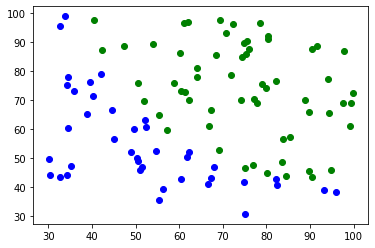

In [356]:
plotData(X, Y)

In [357]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1], 1)
    theta = np.linalg.pinv(np.tranpose(X).dot(X)).dot(np.tranpose(X).dot(y))
    return theta


In [358]:
import numpy as np
def sigmoid(x):
    h_x = 1/(1+np.exp(-x));
    return h_x
    

In [359]:
def computeCost(theta, X, Y):
    m = np.size(Y);
    J = 0;
    #grad_J = np.zeros(np.size(theta));
    #theta1 = np.hstack((0, theta[1:]));
    #s = (-Y * np.log(sigmoid(X*theta)) - (1 - Y) * np.log(1 - sigmoid(X*theta)))
    J = (1/m) * np.sum((-Y * np.log(sigmoid(np.dot(X, theta))) - (1 - Y) * np.log(1 - sigmoid(np.dot(X, theta)))))
    #grad_J = (1/m) * np.sum((sigmoid(X*theta) - Y) * X)
    return J

In [360]:
def gradientDescent(X, Y, theta, alpha, num_iters):
    m = np.size(Y)
    J_history = np.zeros((num_iters, 1))
    cost_val = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        theta = theta - (alpha/m) * (np.sum(np.dot((sigmoid(np.dot(X, theta)) - Y), X)))
        cost_val[iter] = computeCost(X, Y, theta)
        J_history[iter] = computeCost(X, Y, theta)
    return theta

<ipython-input-359-26f4dd987c5f>:7: RuntimeWarning: divide by zero encountered in log
  J = (1/m) * np.sum((-Y * np.log(sigmoid(np.dot(X, theta))) - (1 - Y) * np.log(1 - sigmoid(np.dot(X, theta)))))


0.6931471805599453


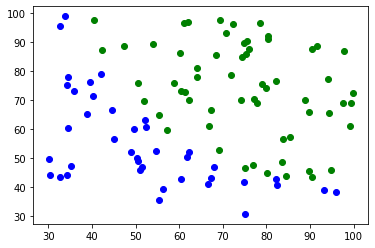

[28.05882245, 101.8278578]
[-29.058822449999997, -102.82785780000002]


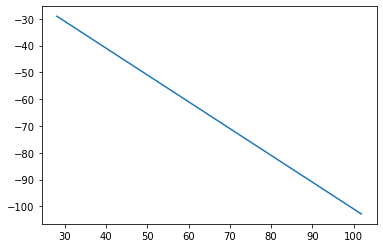

In [410]:


theta = np.zeros(3)


num_iters = 1500
alpha = 0.01

J = computeCost(theta, X_padded, Y)

theta = gradientDescent(X_padded, Y, theta, alpha, num_iters)

print(J)

plotDecisionBoundary(theta, X, Y)

In [408]:
def plotDecisionBoundary(theta, X, Y):
    plotData(X, Y)
    plot_x = [min(X[:,0])-2,  max(X[:,0])+2]
    print(plot_x)
    plot_y =[(-1/theta[0]) *(theta[1]*plot_x[0] + theta[2]), (-1/theta[0]) *(theta[1]*plot_x[1] + theta[2])]
    plt.plot(plot_x, plot_y)
    print(plot_y)